<a href="https://colab.research.google.com/github/Berte08/CSI4106_A2/blob/main/CSI_4106_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information sur le groupe et le rapport**

Numéro du Groupe: 71 Nom des membres du groupe: Berte Tata Saïdatou Numéros d'étudiants des membres du groupe : 300100935


# **DEVOIR 2 ETUDE EMPIRIQUE DE CLASSIFICATION**

# 1
a
-L'objectif de cette étude est de développer un modèle de classification pour évaluer différents types de verre en fonction de leurs caractéristiques et paramètres, principalement utilisée dans le cadre d'enquêtes criminelles.   L'ensemble de données comprend plusieurs variables continues, telles que les taux de différents éléments chimiques présents dans les échantillons de verre, ainsi qu'un identifiant reflétant le type de verre.La variable cible est la classification du type de verre.

-Les applications
Sciences médico-légales : Un des domaines primaires d’application de ce modèle est dans les sciences médico-légales. Le modèle peut être utilisé pour l’induction de règles permettant de classifier les types de verre trouvés sur les lieux de crime, jouant un rôle crucial pour établir des preuves et aider à la résolution d’enquêtes criminelles.
Industrie du verre : Dans le secteur industriel, il peut aider les fabricants de verre à améliorer et optimiser leurs processus de production, en assurant que les composants chimiques sont mélangés dans les proportions correctes pour produire les types de verre souhaités.

b-
1. Nombre d'instances  :
Le dataset comporte 214 instances.
2. Nombre d'attributs :
Il y a 10 attributs continus (sans  l'Id number et l'attribut de classe).
Les attributs sont :
Id number
RI: refractive index
Na: Sodium
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
En plus de ces attributs, il y a aussi un attribut de classe qui identifie le type de verre.
3. Données manquantes :
Il n'y a pas de valeurs manquantes dans cet ensemble de données.
4. Répartition des classes :
Il y a une distribution variée des types de verre avec une somme totale de 214 instances.
Par exemple, il y a 163 instances de verre de fenêtre, et 51 instances de verre non-fenêtre.
5. Description des attributs :
Tous les attributs sont continus et quantitatifs, représentant différentes mesures et compositions chimiques du verre.
L'identifiant (Id number) est unique pour chaque instance et sert à identifier chaque échantillon de verre.
L'attribut de classe (Type of glass) est une valeur catégorielle qui indique le type de verre.

# 2
 a
Les atribut utile pour cette tache sont tous les attribut mentionner dans la question 1b et sont suffisant pour la classification , l'attribut Id number n'est pas utile pour la classification.

**IMPORTATION DES BIBLIOTHEQUES IMPORTANTES ET ACCES DES DONNEES**

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB

In [132]:
url ="https://github.com/Berte08/CSI4106_A2/raw/main/glass.csv"

dataset = pd.read_csv(url)



In [133]:
dataset.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

# **b-Etendues (range) de chaque attribut**

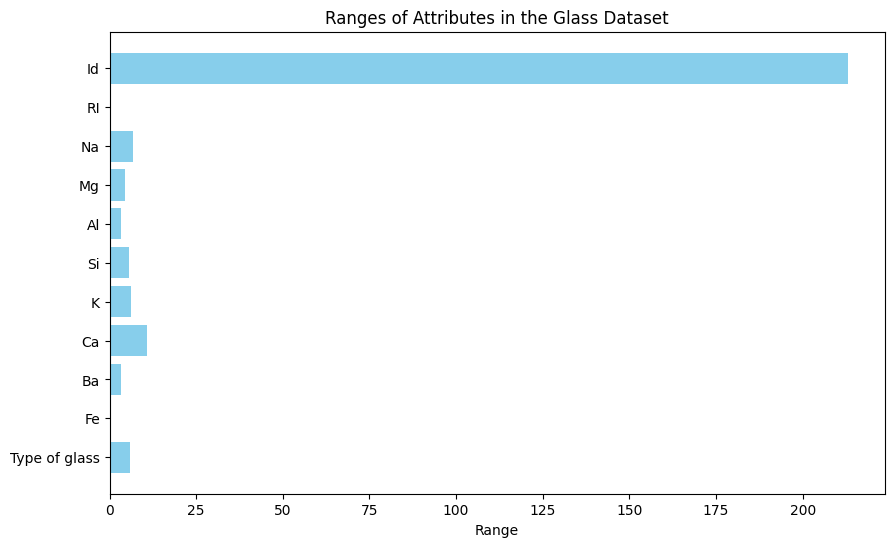

In [134]:
ranges = dataset.describe().loc[['min', 'max']].T
ranges['range'] = ranges['max'] - ranges['min']
plt.figure(figsize=(10, 6))
plt.barh(ranges.index, ranges['range'], color='skyblue')
plt.xlabel('Range')
plt.title('Ranges of Attributes in the Glass Dataset')
plt.gca().invert_yaxis()
plt.show()

 La normalisation pourrait être bénéfique pour ces raisons:

*   Uniformité des Échelles:
Les attributs du dataset "glass" varient en échelle et unité, nécessitant une normalisation pour uniformiser et comparabiliser ces valeurs
*   Facilitation de l'Interprétation:
Les données normalisées facilitent l'interprétation des modèles, en aidant à identifier les attributs les plus influents avec plus de clarté et de précision.



## **3**

 a-
Notre ensemble de donne est composer dattributs continue et categorielle:Les attributs relatifs à la composition chimique du verre sont des attributs continus.
L'attribut indiquant le type de verre est un attribut catégoriel.

Nous allons normaliser les attributs continus du dataset "glass".

In [135]:

from sklearn.preprocessing import MinMaxScaler


# Séparer les attributs et la colonne cible
X = dataset.drop('Type of glass', axis=1)  # Assurez-vous que 'Type' est le nom de votre colonne cible
y = dataset['Type of glass']

# Normalisation des attributs continus
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Séparation du dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Création du modèle KNN et entraînement
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11  0  0  0  0  0]
 [ 1 13  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.87      0.93      0.90        14
           3       1.00      0.67      0.80         3
           5       0.75      0.75      0.75         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.88        43
   macro avg       0.87      0.81      0.83        43
weighted avg       0.89      0.88      0.88        43



b-
Encodage pour attribut categorielle avec encodage one-hot

In [136]:

# Initialiser le OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Appliquer le OneHotEncoder sur la colonne "Type" (vous pouvez changer le nom si nécessaire)
type_encoded = encoder.fit_transform(dataset[['Type of glass']])

# Convertir le résultat en un DataFrame
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['Type of glass']))

# Concaténer le nouvel DataFrame encodé avec le dataset original (sans la colonne "Type")
dataset_encoded = pd.concat([dataset.drop('Type of glass', axis=1), type_encoded_df], axis=1)

# Afficher les premières lignes du dataset encodé
print(dataset_encoded.head())


   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type of glass_2  Type of glass_3  Type of glass_5  Type of glass_6  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Type of glass_7  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


c-Naive Bayes

## 4

a-Modèle régression logistique

Nous avons choisi ces parametre:

*  penalty: Type de régularisation à appliquer. Je choisirai 'l2' pour la régularisation L2, aussi connue sous le nom de Ridge.
*   C: Inverse de la force de régularisation. Je choisirai 1.0 qui est la valeur par défaut.

*   solver: Algorithme à utiliser dans le problème d'optimisation. Je vais utiliser 'lbfgs' car c'est le choix par défaut et il fonctionne bien pour de petits datasets.

* max_iter : Contrôle le nombre maximum d'itérations que l'algorithme doit effectuer pour converger.
*   random_state : Cela contrôle le caractère aléatoire dans l'algorithme de descente de gradient.







Je choisis ces paramètres parce qu'ils sont assez standards et fonctionnent bien dans de nombreuses situations. Les valeurs par défaut sont souvent un bon point de départ, et à partir de là, nous pouvez affiner ces paramètres basés sur la performance du modèle.

In [137]:
from sklearn.linear_model import LogisticRegression

# Définition du modèle avec les paramètres choisis
log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=5000, random_state=42)



b-Modèle Naive Bayes

Nous avons choisi ces parametres:


*  priors : Il s'agit des probabilités a priori des classes. Je vais laisser ce paramètre à None, ce qui signifie que les probabilités a priori seront ajustées en fonction des données.
*   var_smoothing : C'est un paramètre pour lisser les estimations de variance. Je vais utiliser une petite valeur comme 10^(-9), qui est aussi la valeur par défaut, afin d'assurer la stabilité numérique.



In [138]:
from sklearn.naive_bayes import GaussianNB

# Définition du modèle avec les paramètres choisis
gnb_model = GaussianNB(priors=None, var_smoothing=1e-09)


# 5. Entraînez/testez/évaluez les modele

**a**

**Entrainement**

Pour chaque modèle, nous allons utiliser une validation croisée à 4 plis (4-fold cross-validation).Ceci est fait pour s'assurer que chaque observation est utilisée pour le test et l'entraînement, augmentant ainsi la robustesse de nos modèles.

Preparation des donnee

In [139]:

X = dataset.drop('Type of glass', axis=1)
y = dataset['Type of glass']


**Test et b-evaluation**



In [140]:
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate

# Définir les métriques personnalisées
precision_micro = make_scorer(precision_score, average='micro', zero_division=1)
recall_micro = make_scorer(recall_score, average='micro')
precision_macro = make_scorer(precision_score, average='macro', zero_division=1)
recall_macro = make_scorer(recall_score, average='macro')

for model, name in zip([log_reg_model, gnb_model], ['Logistic Regression', 'Naive Bayes']):
    scores = cross_validate(model, X, y, cv=4,
                            scoring={'precision_micro': precision_micro,
                                     'recall_micro': recall_micro,
                                     'precision_macro': precision_macro,
                                     'recall_macro': recall_macro},
                            error_score='raise')
    print(f"Résultats pour {name}:")
    print(f"Précision micro-moyenne: {scores['test_precision_micro'].mean()}")
    print(f"Rappel micro-moyen: {scores['test_recall_micro'].mean()}")
    print(f"Précision macro-moyenne: {scores['test_precision_macro'].mean()}")
    print(f"Rappel macro-moyen: {scores['test_recall_macro'].mean()}")


Résultats pour Logistic Regression:
Précision micro-moyenne: 0.8409329140461216
Rappel micro-moyen: 0.8409329140461216
Précision macro-moyenne: 0.8811858076563959
Rappel macro-moyen: 0.8757294584500467
Résultats pour Naive Bayes:
Précision micro-moyenne: 0.7997030048916841
Rappel micro-moyen: 0.7997030048916841
Précision macro-moyenne: 0.8740801656920077
Rappel macro-moyen: 0.7843106540861959


# **6**

**Modification des parametres **

Modfication
Naïve Bayes
Nous avons modifie les valeur du parametre var_smoothing

In [141]:
from sklearn.naive_bayes import GaussianNB

# var_smoothing = 0.5
gnb_model_1 = GaussianNB(var_smoothing=0.5)
scores = cross_validate(gnb_model_1, X, y, cv=4,
                        scoring={'precision_macro': precision_macro,
                                 'recall_macro': recall_macro})

print(f"Résultats avec var_smoothing=0.5:")
print(f"Précision macro-moyenne: {scores['test_precision_macro'].mean()}")
print(f"Rappel macro-moyen: {scores['test_recall_macro'].mean()}\n")

# var_smoothing = 1
gnb_model_2 = GaussianNB(var_smoothing=1)
scores = cross_validate(gnb_model_2, X, y, cv=4,
                        scoring={'precision_macro': precision_macro,
                                 'recall_macro': recall_macro})

print(f"Résultats avec var_smoothing=1:")
print(f"Précision macro-moyenne: {scores['test_precision_macro'].mean()}")
print(f"Rappel macro-moyen: {scores['test_recall_macro'].mean()}")


Résultats avec var_smoothing=0.5:
Précision macro-moyenne: 0.8954328850162184
Rappel macro-moyen: 0.45794633642930854

Résultats avec var_smoothing=1:
Précision macro-moyenne: 0.9095707566271065
Rappel macro-moyen: 0.3740970072239422


Modification  du Logistic Regression,les valeur du solveur ont ete modifier,les parametre penalty,C ont egalement ete retirer

In [142]:
from sklearn.linear_model import LogisticRegression

# Test avec le solveur ‘newton-cg’
log_reg_model_1 = LogisticRegression(solver='newton-cg', max_iter=5000, random_state=42)
scores = cross_validate(log_reg_model_1, X, y, cv=4,
                        scoring={'precision_macro': precision_macro,
                                 'recall_macro': recall_macro})

print(f"Résultats avec solver='newton-cg':")
print(f"Précision macro-moyenne: {scores['test_precision_macro'].mean()}")
print(f"Rappel macro-moyen: {scores['test_recall_macro'].mean()}\n")

# Test avec le solveur ‘sag’
log_reg_model_2 = LogisticRegression(solver='sag', max_iter=5000, random_state=42)
scores = cross_validate(log_reg_model_2, X, y, cv=4,
                        scoring={'precision_macro': precision_macro,
                                 'recall_macro': recall_macro})

print(f"Résultats avec solver='sag':")
print(f"Précision macro-moyenne: {scores['test_precision_macro'].mean()}")
print(f"Rappel macro-moyen: {scores['test_recall_macro'].mean()}")


Résultats avec solver='newton-cg':
Précision macro-moyenne: 0.8853524743230625
Rappel macro-moyen: 0.8816818394024276

Résultats avec solver='sag':
Précision macro-moyenne: 0.9126633986928104
Rappel macro-moyen: 0.899359305125559


# **7- Analyse des resultats**

**Resultat**

Régression Logistique (paramètres par défaut)

Précision micro-moyenne: 0.8409
Rappel micro-moyen: 0.8409
Précision macro-moyenne: 0.8812
Rappel macro-moyen: 0.8757

Régression Logistique (solver='newton-cg')
Précision macro-moyenne: 0.8854
Rappel macro-moyen: 0.8817

Régression Logistique (solver='sag')
Précision macro-moyenne: 0.9127
Rappel macro-moyen: 0.8994

Naive Bayes (paramètres par défaut)
Précision micro-moyenne: 0.7997
Rappel micro-moyen: 0.7997
Précision macro-moyenne: 0.8741
Rappel macro-moyen: 0.7843

Naive Bayes (var_smoothing=0.5)
Précision macro-moyenne: 0.8954
Rappel macro-moyen: 0.4579
Naive Bayes (var_smoothing=1)

Précision macro-moyenne: 0.9096
Rappel macro-moyen: 0.3741

**Analyse**

La régression logistique performe mieux en termes de précision et de rappel, à la fois pour les moyennes micro et macro.Le changement du solver à 'sag' a amélioré la performance du modèle Régression Logistique en termes de précision et de rappel macro-moyens.Pour Naive Bayes en augmentant la valeur de var_smoothing, la précision macro-moyenne augmente, mais le rappel macro-moyen diminue considérablement.

Pour la régression logistique avec les paramètres par défaut, la précision et le rappel micro-moyens sont légèrement inférieurs à leurs aux valeur macro-moyens.
Pour Naive Bayes, avec les paramètres par défaut, il y a une différence plus importante entre les scores micro et macro, indiquant une variabilité dans la performance à travers les différentes classes.

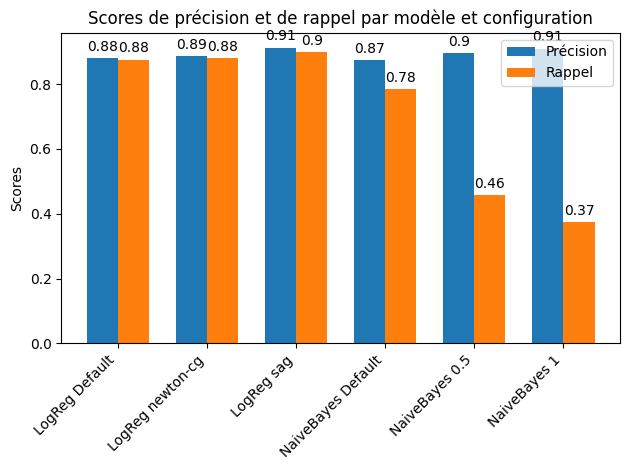

In [143]:
# Les noms des modèles et leurs configurations
models = ['LogReg Default', 'LogReg newton-cg', 'LogReg sag', 'NaiveBayes Default', 'NaiveBayes 0.5', 'NaiveBayes 1']

# Les scores de précision macro-moyenne
precision_scores = [0.8812, 0.8854, 0.9127, 0.8741, 0.8954, 0.9096]

# Les scores de rappel macro-moyen
recall_scores = [0.8757, 0.8817, 0.8994, 0.7843, 0.4579, 0.3741]

x = np.arange(len(models))  # les labels de l'axe x

width = 0.35  # la largeur des barres

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, precision_scores, width, label='Précision')
rects2 = ax.bar(x + width/2, recall_scores, width, label='Rappel')


ax.set_ylabel('Scores')
ax.set_title('Scores de précision et de rappel par modèle et configuration')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# **8-Conclusion**

 Le modèle  de Régression Logistique semble plus robuste et performe de manière constante avec différentes modifications des paramètres. Le choix du solver 'sag' semble être le plus efficace parmi ceux essayés.

 Bien que le changement de var_smoothing  dans le modele Naive Bayes ait conduit à une augmentation de la précision, il a également entraîné une réduction significative du rappel, ce qui pourrait indiquer que le modèle est devenu trop spécifique à certaines classes et moins sensible à d'autres.

Chacune des modifications des paramètres dans les modèles a eu un impact notable sur leurs performances, ce qui démontre l'importance de l'ajustement des paramètres dans l'optimisation des modèles de machine learning.

9-Reference:

https://openclassrooms.com/fr/courses/7771531-decouvrez-les-librairies-python-pour-la-data-science/7858285-tracez-des-graphiques-avec-matplotlib
https://chat.openai.com
https://www.kaggle.com/datasets/warcoder/knapsack-problem/data
https://www.youtube.com/watch?v=RLYoEyIHL6A
https://www.youtube.com/watch?v=9PQV_yERZBU
https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/naive_bayes.html
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/cross_validation.html
https://matplotlib.org/stable/users/index.html

